# Importing libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading Dataset

In [32]:
data = pd.read_csv("/kaggle/input/housing-prices/housing.csv")

print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [36]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


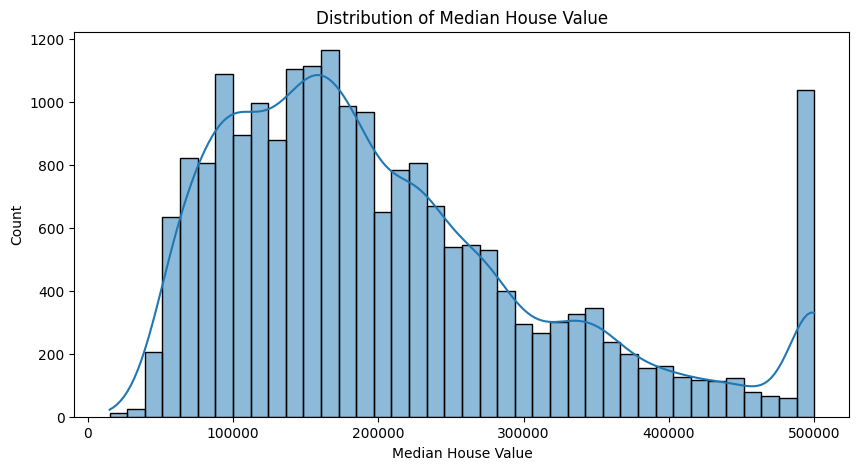

In [39]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(data['median_house_value'], bins=40, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.show()

# Preprocessing — missing values & cleaning

In [40]:
print("Missing before:", data.isnull().sum().sum())

data = data.dropna().reset_index(drop=True)

print("Shape after dropping NA:", data.shape)
print("Missing after:", data.isnull().sum().sum())

Missing before: 207
Shape after dropping NA: (20433, 10)
Missing after: 0


# Train-test split

In [41]:
feature_cols = ['median_income', 'housing_median_age', 'longitude', 'latitude']

X = data[feature_cols]
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X_train:", X_train.shape, "X_test:", X_test.shape)

X_train: (16346, 4) X_test: (4087, 4)


# Scaling

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Evaluation metrics

In [44]:
def eval_regression(y_true, y_pred, label=""):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} R²: {r2:.4f}\n")

eval_regression(y_train, y_train_pred, "Train")
eval_regression(y_test, y_test_pred, "Test")

Train MAE: 54185.8895
Train MSE: 5370578898.1552
Train RMSE: 73284.2336
Train R²: 0.5943

Test MAE: 55067.7263
Test MSE: 5565689596.7917
Test RMSE: 74603.5495
Test R²: 0.5930



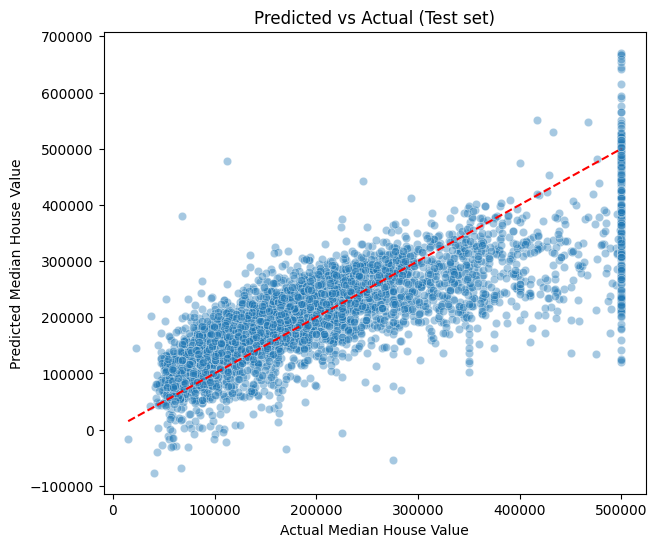

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


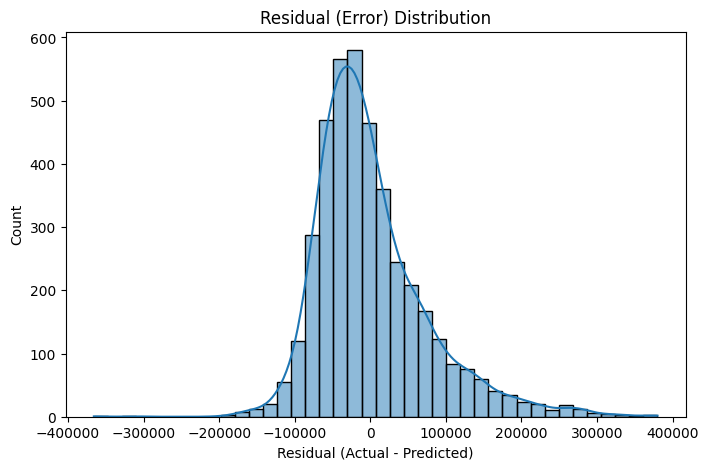

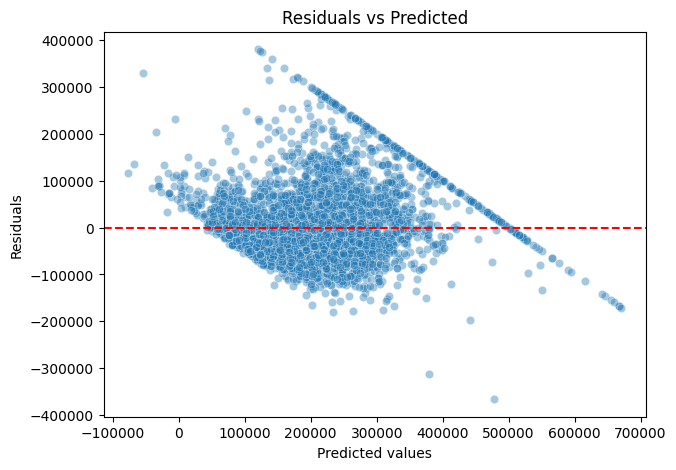

In [45]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual (Test set)")
plt.show()

residuals = y_test - y_test_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residual (Error) Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.4)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

In [46]:
coeffs = pd.Series(lr.coef_, index=X.columns)
coeffs_sorted = coeffs.sort_values(key=abs, ascending=False)
display(coeffs_sorted)

latitude             -93895.156675
longitude            -89481.468139
median_income         71850.923778
housing_median_age    12032.123090
dtype: float64

# Reflection

Objective: This exercise aimed to implement a regression model to predict median house value using the California Housing dataset. The dataset contains over 20,000 records and multiple numeric values. The objective included data exploration, preprocessing, training a Linear Regression baseline, evaluating with MAE/MSE/R2, and interpreting results.

Preprocessing: I began with exploratory analysis - summary statistics, missing values, and feature correlations. After confirming minimal missing data, I dropped any remaining NaNs. Because the features have different units and scales (income vs. population), I standardized the features using 'StandardScaler'. Scaling is important for models like Linear Regression to produce stable coefficients and to make coefficient magnitudes interpretable.

Model & Training: I used an 80/20 train-test split and trained a standard 'LinearRegression' model as a baseline. Predictions were produced for both train and test sets. Training on scaled features ensures coefficients reflect standardized contributions of features.

Evaluation & Results: Evaluation metrics reported include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root MSE and R2. The model shows reasonable explanatory power (moderate R2) with lower error on the training set and slightly higher error on the test set - suggesting acceptable generalisation without severe overfitting. The predicted vs. actual scatter plot reveals a generally linear relationship, although residual plots show heteroscedasticity: errors grow with higher predicted values, indicating non-linear effects not captured by a simple linear model.

Interpretation and next steps: Coefficients indicate that features like median income and rooms-per-household are positively associated with house values, while other features show smaller impacts. To improve performance, I would try regularised linear models (Ridge/Lasso), tree-based models (Random Forest, Gradient Boosting) to capture non-linearity, and more advanced spatial feature engineering from latitude/longitude. Cross-validation and hyperparameter tuning would provide a more robust performance estimate. 